In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [8]:
def create_model():
    input_layer = tf.keras.layers.Input(shape=(229, 229, 3))
    base_model = tf.keras.applications.InceptionResNetV2(input_tensor=input_layer,
                                                   weights='imagenet',
                                                   include_top=False)
    base_model.trainable = False
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.Dense(2, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=input_layer, outputs=x)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
dataset_name = 'cats_vs_dogs'
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

In [5]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\alpye\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    download_size=786.68 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A

In [6]:
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (229, 229))
    image = image / 255.0
    return image, features['label']

train_dataset = dataset.map(preprocess).batch(32)

In [9]:
model = create_model()
model.fit(train_dataset, epochs=3)

Epoch 1/3
727/727 [==============================] - 392s 539ms/step - loss: 0.0435 - accuracy: 0.9873
Epoch 2/3
727/727 [==============================] - 393s 540ms/step - loss: 0.0296 - accuracy: 0.9917
Epoch 3/3
727/727 [==============================] - 392s 539ms/step - loss: 0.0267 - accuracy: 0.9925


In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

batch_normalization_34 (BatchNo (None, 26, 26, 48)   144         conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_31 (Activation)      (None, 26, 26, 32)   0           batch_normalization_31[0][0]     
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 26, 26, 48)   0           batch_normalization_34[0][0]     
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 26, 26, 32)   10240       block35_3_ac[0][0]               
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 26, 26, 32)   9216        activation_31[0][0]              
__________________________________________________________________________________________________
conv2d_35 

__________________________________________________________________________________________________
batch_normalization_58 (BatchNo (None, 26, 26, 48)   144         conv2d_58[0][0]                  
__________________________________________________________________________________________________
activation_55 (Activation)      (None, 26, 26, 32)   0           batch_normalization_55[0][0]     
__________________________________________________________________________________________________
activation_58 (Activation)      (None, 26, 26, 48)   0           batch_normalization_58[0][0]     
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 26, 26, 32)   10240       block35_7_ac[0][0]               
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 26, 26, 32)   9216        activation_55[0][0]              
__________

activation_79 (Activation)      (None, 12, 12, 192)  0           batch_normalization_79[0][0]     
__________________________________________________________________________________________________
block17_1_mixed (Concatenate)   (None, 12, 12, 384)  0           activation_76[0][0]              
                                                                 activation_79[0][0]              
__________________________________________________________________________________________________
block17_1_conv (Conv2D)         (None, 12, 12, 1088) 418880      block17_1_mixed[0][0]            
__________________________________________________________________________________________________
block17_1 (Lambda)              (None, 12, 12, 1088) 0           mixed_6a[0][0]                   
                                                                 block17_1_conv[0][0]             
__________________________________________________________________________________________________
block17_1_

block17_7_conv (Conv2D)         (None, 12, 12, 1088) 418880      block17_7_mixed[0][0]            
__________________________________________________________________________________________________
block17_7 (Lambda)              (None, 12, 12, 1088) 0           block17_6_ac[0][0]               
                                                                 block17_7_conv[0][0]             
__________________________________________________________________________________________________
block17_7_ac (Activation)       (None, 12, 12, 1088) 0           block17_7[0][0]                  
__________________________________________________________________________________________________
conv2d_105 (Conv2D)             (None, 12, 12, 128)  139264      block17_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_105 (BatchN (None, 12, 12, 128)  384         conv2d_105[0][0]                 
__________

batch_normalization_125 (BatchN (None, 12, 12, 128)  384         conv2d_125[0][0]                 
__________________________________________________________________________________________________
activation_125 (Activation)     (None, 12, 12, 128)  0           batch_normalization_125[0][0]    
__________________________________________________________________________________________________
conv2d_126 (Conv2D)             (None, 12, 12, 160)  143360      activation_125[0][0]             
__________________________________________________________________________________________________
batch_normalization_126 (BatchN (None, 12, 12, 160)  480         conv2d_126[0][0]                 
__________________________________________________________________________________________________
activation_126 (Activation)     (None, 12, 12, 160)  0           batch_normalization_126[0][0]    
__________________________________________________________________________________________________
conv2d_124

batch_normalization_193 (BatchN (None, 5, 5, 224)    672         conv2d_193[0][0]                 
__________________________________________________________________________________________________
activation_193 (Activation)     (None, 5, 5, 224)    0           batch_normalization_193[0][0]    
__________________________________________________________________________________________________
conv2d_191 (Conv2D)             (None, 5, 5, 192)    399360      block8_7_ac[0][0]                
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (None, 5, 5, 256)    172032      activation_193[0][0]             
__________________________________________________________________________________________________
batch_normalization_191 (BatchN (None, 5, 5, 192)    576         conv2d_191[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [11]:
tf.saved_model.save(model,'model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [12]:
!cd C:\Program Files (x86)\Intel\openvino_2021.2.185\bin && setupvars.bat

[setupvars.bat] OpenVINO environment initialized


In [13]:
!cd C:\Program Files (x86)\Intel\openvino_2021\deployment_tools\model_optimizer && \
    python mo_tf.py --saved_model_dir C:\Users\alpye\Desktop\GitHub_posts\Efficient_of_OpenVINO_on_DLApp\model \
      --input_shape [1,229,229,3]  --output_dir C:\Users\alpye\Desktop\GitHub_posts\Efficient_of_OpenVINO_on_DLApp\ie_model\

Model Optimizer arguments:

2021-03-31 16:29:26.655036: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2021-03-31 16:29:30.891815: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2021-03-31 16:29:31.243622: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.442GHz coreCount: 6 deviceMemorySize: 3.00GiB deviceMemoryBandwidth: 78.32GiB/s



Common parameters:
	- Path to the Input Model: 	None
	- Path for generated IR: 	C:\Users\alpye\Desktop\GitHub_posts\Efficient_of_OpenVINO_on_DLApp\ie_model\
	- IR output name: 	saved_model
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,229,229,3]
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	None
	- Reverse input channels: 	False
TensorFlow specific parameters:
	- Input model in text protobuf format: 	False
	- Path to model dump for TensorBoard: 	None
	- List of shared libraries with TensorFlow custom layers implementation: 	None
	- Update the configuration file with input/output node names: 	None
	- Use configuration file used to generate 

2021-03-31 16:29:31.243650: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2021-03-31 16:29:31.288282: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2021-03-31 16:29:31.320109: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
2021-03-31 16:29:31.327435: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library curand64_10.dll
2021-03-31 16:29:31.362432: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cusolver64_10.dll
2021-03-31 16:29:31.383550: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cusparse64_10.dll
2021-03-31 16:29:31.489880: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudn

In [1]:
from openvino.inference_engine import IECore, IENetwork
ie = IECore()
net = ie.read_network(model='ie_model\saved_model.xml', weights = 'ie_model\saved_model.bin')

In [3]:
print(ie.available_devices)

['CPU', 'GNA', 'GPU']


In [4]:
exec_net_CPU = ie.load_network(network=net, device_name='CPU')
exec_net_GPU = ie.load_network(network=net, device_name='GPU')

In [5]:
model = tf.keras.models.load_model('model')

In [41]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import cv2

def preprocess(image, net, model, ie = True):
    
    image = cv2.imread(image)
    image = cv2.resize(image, (229,229))
    if ie == True:
        input_layer = next(iter(net.inputs))
        n,c,h,w = net.inputs[input_layer].shape
        image = image.transpose((2, 0, 1))
        image = image.reshape((n, c, h, w))
        return image
    else:
        image.reshape((model.get_layer('input_1').input.shape[1:]))
        image = tf.expand_dims(image, axis=0)
        
        return image

In [16]:
import os
import time

input_layer = next(iter(net.inputs))
image_list = os.listdir('img')
ie_cpu = []
ie_gpu = []
tf_ = []
for image in image_list:
    input_image = preprocess('img/'+str(image), net, model)
    
    ie_cpu_start = time.time()
    inference_res = exec_net_CPU.infer({input_layer : input_image})
    ie_cpu_total = time.time() - ie_cpu_start
    ie_cpu.append(ie_cpu_total)
    
    ie_gpu_start = time.time()
    inference_res = exec_net_GPU.infer({input_layer : input_image})
    ie_gpu_total = time.time() - ie_gpu_start
    ie_gpu.append(ie_gpu_total)
    
    input_image = preprocess('img/'+str(image), net, model, ie = False)
    tf_start = time.time()
    model.predict(input_image)
    tf_total = time.time() - tf_start
    tf_.append(tf_total)

C:\Users\alpye\.conda\envs\openvino\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  after removing the cwd from sys.path.


In [17]:
print(ie_cpu)
print(ie_gpu)
print(tf_)

[0.05271744728088379, 0.044402122497558594, 0.03990626335144043, 0.041565656661987305, 0.04868745803833008, 0.055771589279174805]
[0.07488870620727539, 0.0750129222869873, 0.07501769065856934, 0.07505440711975098, 0.07789325714111328, 0.07447695732116699]
[0.07818984985351562, 0.07917594909667969, 0.08248567581176758, 0.07901525497436523, 0.07847809791564941, 0.07938432693481445]


In [18]:
import numpy as np
ie_cpu_mean = np.mean(np.asarray(ie_cpu))
ie_gpu_mean = np.mean(np.asarray(ie_gpu))
tf_mean = np.mean(np.asarray(tf_))

In [12]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt

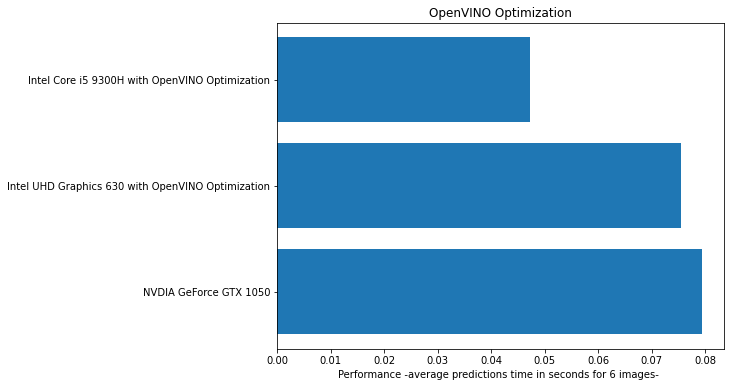

In [36]:
fig, ax = plt.subplots(figsize = (8,6))
hardware = ('Intel Core i5 9300H with OpenVINO Optimization', 'Intel UHD Graphics 630 with OpenVINO Optimization', 'NVDIA GeForce GTX 1050')
y_pos = np.arange(len(hardware))
performance = np.asarray([ie_cpu_mean, ie_gpu_mean, tf_mean])
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(hardware)
ax.invert_yaxis()
ax.set_xlabel('Performance -average predictions time in seconds for 6 images- ')
ax.set_title('OpenVINO Optimization')
plt.show()
fig.savefig('fig.jpg', dpi=240, bbox_inches = 'tight')